In [1]:
import pandas as pd
import dotenv
import pathlib as pl

In [2]:
PROJECT_PATH = pl.Path(dotenv.find_dotenv()).absolute().parent
PROJECT_PATH

WindowsPath('c:/Users/yawlc.000/OneDrive/Documents/JOSEPH HUARD-COX/Data_Science_Projects/credit-card-fraud')

In [3]:
df = pd.read_parquet(PROJECT_PATH.joinpath('data', 'eda-pack', 'df_eda.pqt'))
df.head()

,Amount,Time,V1,V10,V11,V12,V13,V14,V15,V16,...,V27,V28,V3,V4,V5,V6,V7,V8,V9,Class
100385,6.60,67497,1.248181,0.450152,0.594439,0.270928,-0.837829,-1.038278,-2.006672,0.730889,...,0.077364,0.018067,1.736423,-0.233203,-2.080137,0.314319,-1.700046,0.396330,0.548062,0
195417,206.80,131039,1.899245,1.601190,0.409075,0.092257,1.126877,-0.465574,-0.692675,-0.148340,...,-0.011555,-0.018064,-1.097199,-1.636155,-1.169883,0.253805,-1.128496,-0.008958,-1.391654,0
146266,27.38,87573,-0.359429,0.931194,-0.737914,-0.615335,-0.565855,0.341403,-1.410772,1.181206,...,0.119534,0.147694,1.013395,2.711956,1.246030,0.943635,0.859482,0.225879,-1.866359,0
43772,756.98,41646,0.041892,0.904048,-0.691629,-0.276858,1.025435,-0.655052,-0.457207,-0.655080,...,-0.083133,0.157979,0.004573,-0.530819,-2.476387,-0.362975,-0.127389,-0.327078,-1.526095,0
254810,67.75,156923,-0.655732,-0.033517,0.466357,-0.460542,-0.591842,0.561178,-1.128252,1.482957,...,0.048715,0.090091,-0.486288,-2.245004,0.152155,-0.898722,0.059572,0.354594,-1.492337,0


In [4]:
print(df['Class'].value_counts())

Class
0    227451
1       394
Name: count, dtype: int64


In [5]:
y_col = 'Class'
feature_cols =[el for el in df.columns if el != y_col]

In [6]:
import plotly.express as px

In [7]:
cor = pd.DataFrame(
    df[feature_cols].corrwith(df['Class'], method = 'kendall'),
    columns = ['Class']
)
px.imshow(
    cor,
    range_color = [-1, 1]
)

In [10]:
from credit_fraud.raincloud import pyplot_raincloud
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [14]:
rcParams['figure.figsize']

[6.4, 4.8]

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
standardizer = StandardScaler()
df_scaled = df.copy()
df_scaled[feature_cols] = standardizer.fit_transform(df_scaled[feature_cols])

Text(0.5, 0.98, 'Fraud vs Regular transaction distributions - unscaled densities')

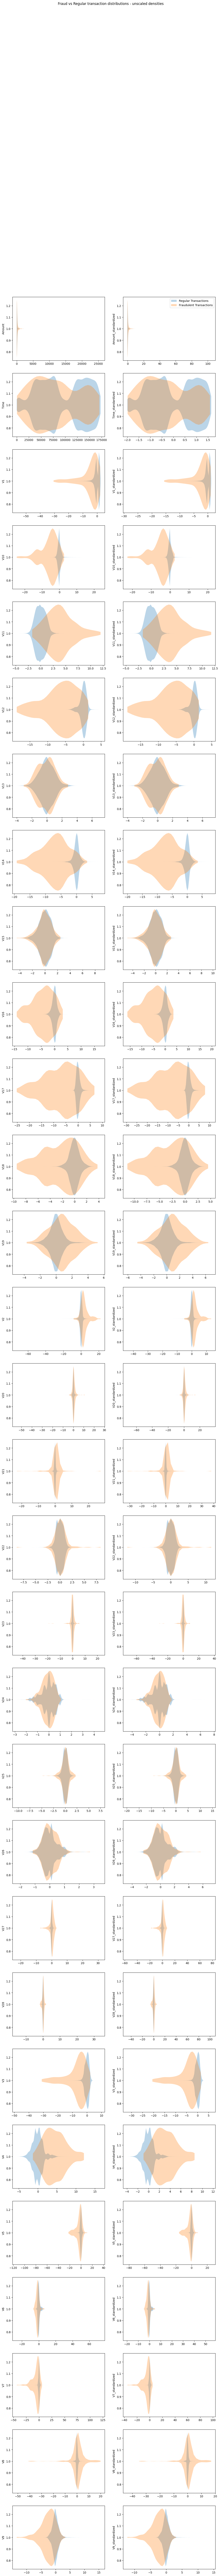

In [38]:
fig, axes = plt.subplots(
    nrows = len(feature_cols),
    ncols = 2,
    figsize = [
        2 * rcParams['figure.figsize'][0],
        len(feature_cols) * rcParams['figure.figsize'][1]
    ]
)
df_class0 = df.loc[df[y_col] == 0, feature_cols]
df_class1 = df.loc[df[y_col] == 1, feature_cols]

df_scaled_class0 = df_scaled.loc[df_scaled[y_col] == 0, feature_cols]
df_scaled_class1 = df_scaled.loc[df_scaled[y_col] == 1, feature_cols]

violin_dict: dict = dict()

for i, col in enumerate(feature_cols):

    violin_dict[col] = dict()
    
    violin_dict[col][0] = axes[i, 0].violinplot(
        df_class0.loc[:, col],
        vert = False,
        showmeans = False,
        showmedians = False,
        showextrema = False
    )
    
    violin_dict[col][1] = axes[i, 0].violinplot(
        df_class1.loc[:, col],
        vert = False,
        showmeans = False,
        showmedians = False,
        showextrema = False,
        points = 30
    )

    axes[i, 0].set_ylabel(col)

    violin_dict[f'{col}_standardized'] = dict()
    
    violin_dict[f'{col}_standardized'][0] = axes[i, 1].violinplot(
        df_scaled_class0.loc[:, col],
        vert = False,
        showmeans = False,
        showmedians = False,
        showextrema = False
    )
    
    violin_dict[f'{col}_standardized'][1] = axes[i, 1].violinplot(
        df_scaled_class1.loc[:, col],
        vert = False,
        showmeans = False,
        showmedians = False,
        showextrema = False,
        points = 30
    )

    axes[i, 1].set_ylabel(f'{col}_standardized')

axes[0, 1].legend(['Regular Transactions', 'Fraudulent Transactions'])
fig.suptitle('Fraud vs Regular transaction distributions - unscaled densities')